In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("../week2/cleaned_playstore.csv", index_col=0)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.900000e+07,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.400000e+07,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000e+06,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.500000e+07,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000e+06,100000,Free,0.0,Everyone


In [3]:
unique_values = data['Category'].unique()
unique_values.sort()

categories = pd.DataFrame({'Category': unique_values})

installs = data.groupby('Category')['Installs'].sum().reset_index()
categories['Total_Installs'] = installs['Installs']

prices = data.groupby('Category')['Price'].sum().reset_index()
categories['Total_Price'] = prices['Price']

data['Revenue'] = data['Price'] * data['Installs']
revenues = data.groupby('Category')['Revenue'].sum().reset_index()
categories['Total_Revenue'] = revenues['Revenue']

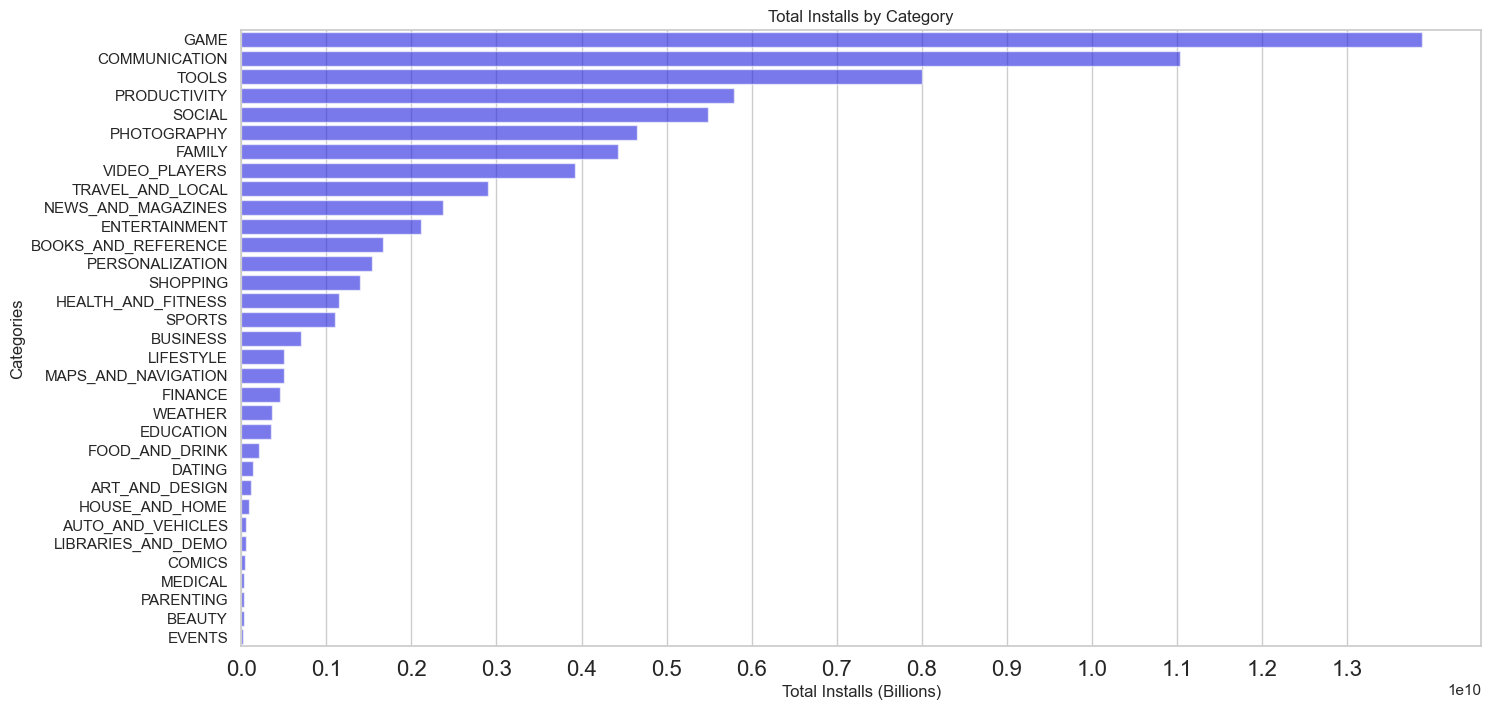

In [4]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(data = categories.sort_values('Total_Installs', ascending=False),
            x = 'Total_Installs', y = 'Category', color = 'blue', alpha = 0.6 ,ax= ax)
ax.set_title('Total Installs by Category')
ax.set_xlabel('Total Installs (Billions)')  
ax.set_ylabel('Categories')
plt.xticks(np.arange(0, 14000000000, step = 1000000000),size = 16) 
_ = ax

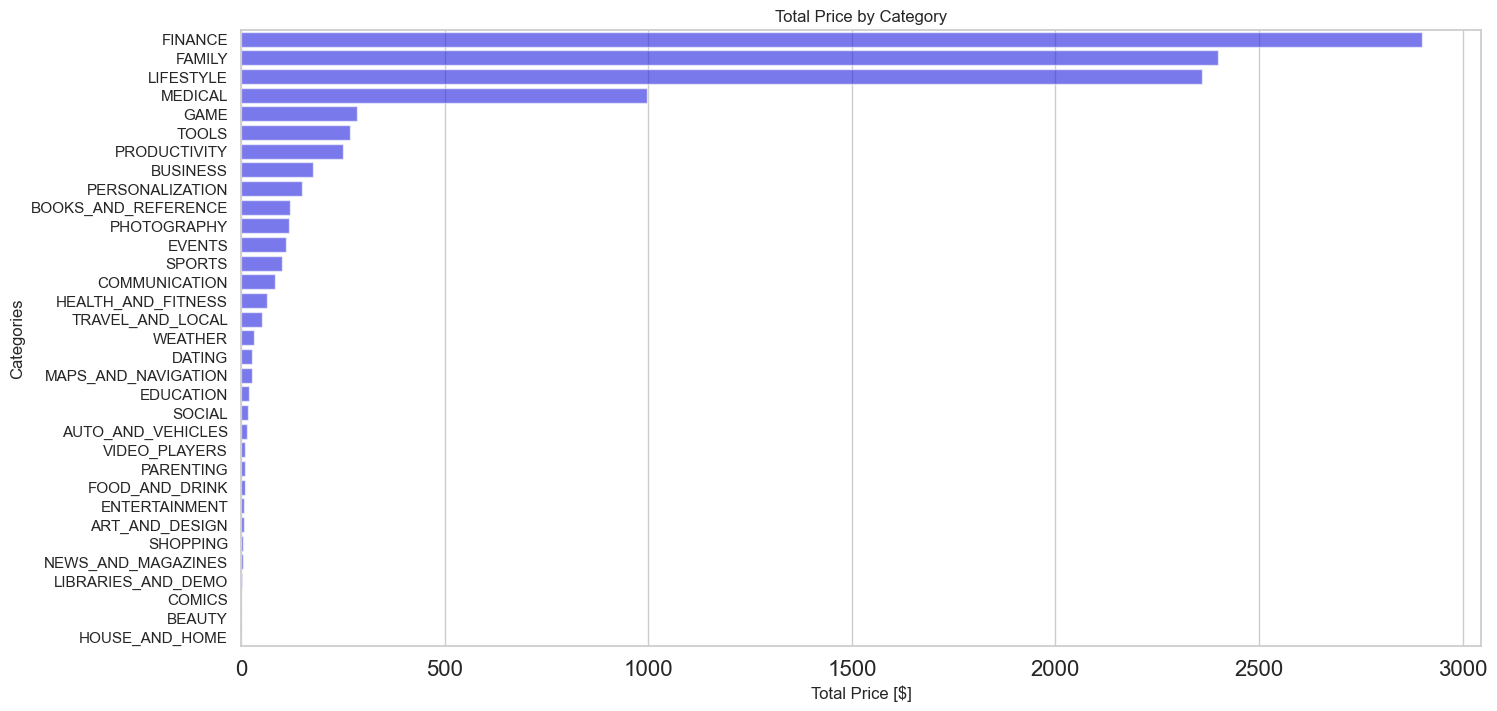

In [5]:
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(data = categories.sort_values('Total_Price', ascending=False),
            x = 'Total_Price', y = 'Category', color = 'blue', alpha = 0.6 ,ax= ax)
ax.set_title('Total Price by Category')
ax.set_xlabel('Total Price [$]')
ax.set_ylabel('Categories')
plt.xticks(size = 16)
_ = ax

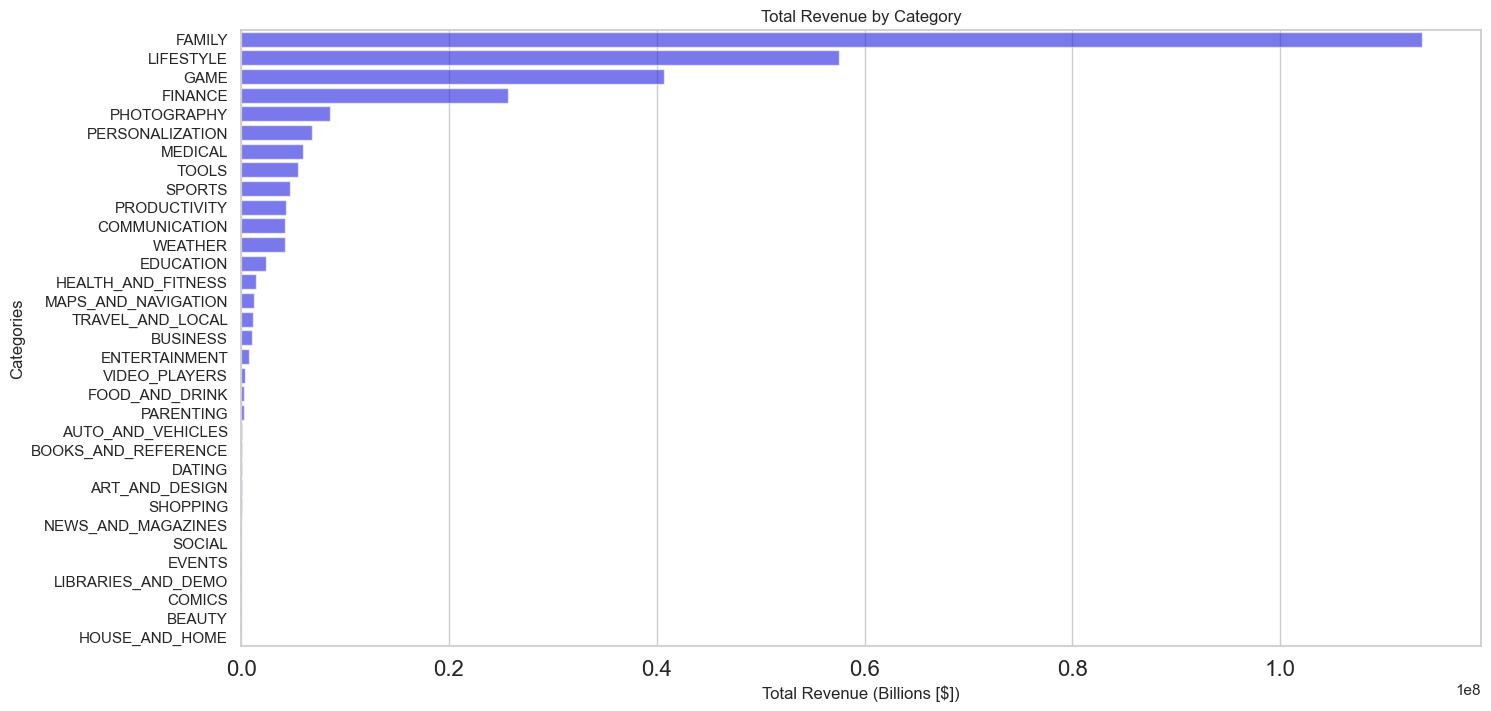

In [8]:
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(data = categories.sort_values('Total_Revenue', ascending=False),
            x = 'Total_Revenue', y = 'Category', color = 'blue', alpha = 0.6 ,ax= ax)
ax.set_title('Total Revenue by Category')
ax.set_xlabel('Total Revenue (Billions [$])')
ax.set_ylabel('Categories')
plt.xticks(size = 16)       
_ = ax